In [1]:
import numpy as np
import pandas as pd
import scipy

from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# SPECS FOR EXPERIMENT: number of samples and ICS distribution params
N_SAMPLES=5000
ICS = [
    {'mean': 0.0, 'var': 1.0},
    {'mean': 0.0, 'var': 1.0}
]
np.random.seed(1000)

In [3]:
# Get samples according to parameters set in each IC
for i, specs in enumerate(ICS):
    # Sample according to IC's mean and var
    sample_i = np.random.normal(
        specs['mean'],
        specs['var'],
        (N_SAMPLES,)
    )
    ICS[i].update(
        {'sample': sample_i}
    )
    print('-'*100)
    print('IC {}:\nMean: {}\nVar {}\nSample size: {}\nSample:\n{}'.format(
        i+1,
        specs['mean'],
        specs['var'],
        sample_i.shape,
        sample_i
    ))
print('-'*100)

----------------------------------------------------------------------------------------------------
IC 1:
Mean: 0.0
Var 1.0
Sample size: (5000,)
Sample:
[-0.8044583   0.32093155 -0.02548288 ... -0.18954244 -2.23334735
 -0.31624526]
----------------------------------------------------------------------------------------------------
IC 2:
Mean: 0.0
Var 1.0
Sample size: (5000,)
Sample:
[ 0.60796251  0.93846369 -0.8482785  ... -0.06434491  0.50570314
 -1.63094421]
----------------------------------------------------------------------------------------------------


In [4]:
# Get Matrix of ICs
I = np.array([
    ic['sample'] for ic in ICS
])

print('-'*100)
print('IC MATRIX')
print('Shape: {}\nMatrix:\n{}'.format(
        I.shape,
        I
    )
)
print('-'*100)

----------------------------------------------------------------------------------------------------
IC MATRIX
Shape: (2, 5000)
Matrix:
[[-0.8044583   0.32093155 -0.02548288 ... -0.18954244 -2.23334735
  -0.31624526]
 [ 0.60796251  0.93846369 -0.8482785  ... -0.06434491  0.50570314
  -1.63094421]]
----------------------------------------------------------------------------------------------------


In [5]:
# Get Mixing Matrix
A = np.array([
    [0.5, 0.1],
    [-0.3, 0.3],
    [0, -0.6],
    [0.5, 0.5],
    [0.1, -0.1]
])

print('-'*100)
print('MIXING MATRIX')
print('Shape: {}\nMatrix:\n{}'.format(
        A.shape,
        A
    )
)
print('-'*100)

----------------------------------------------------------------------------------------------------
MIXING MATRIX
Shape: (5, 2)
Matrix:
[[ 0.5  0.1]
 [-0.3  0.3]
 [ 0.  -0.6]
 [ 0.5  0.5]
 [ 0.1 -0.1]]
----------------------------------------------------------------------------------------------------


In [6]:
# Get mixed variables by multiplying A and I
X = pd.DataFrame(
    (A@I).T
)
X.head()

,0,1,2,3,4
0,-0.341433,0.423726,-0.364778,-0.098248,-0.141242
1,0.254312,0.185260,-0.563078,0.629698,-0.061753
2,-0.097569,-0.246839,0.508967,-0.436881,0.082280
3,0.410096,0.070504,-0.527602,0.761830,-0.023501
4,-0.166351,0.042382,0.095714,-0.230160,-0.014127


In [7]:
X.describe()

,0,1,2,3,4
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.007195,0.000109,0.007013,-0.011870,-0.000036
std,0.515962,0.425509,0.604814,0.717528,0.141836
min,-1.952558,-1.681026,-2.056822,-3.404236,-0.487046
25%,-0.359104,-0.296442,-0.408675,-0.507577,-0.097135
50%,0.000717,0.002106,0.007869,-0.002415,-0.000702
75%,0.350788,0.291406,0.428156,0.483251,0.098814
max,1.687681,1.461137,2.180815,2.483530,0.560342


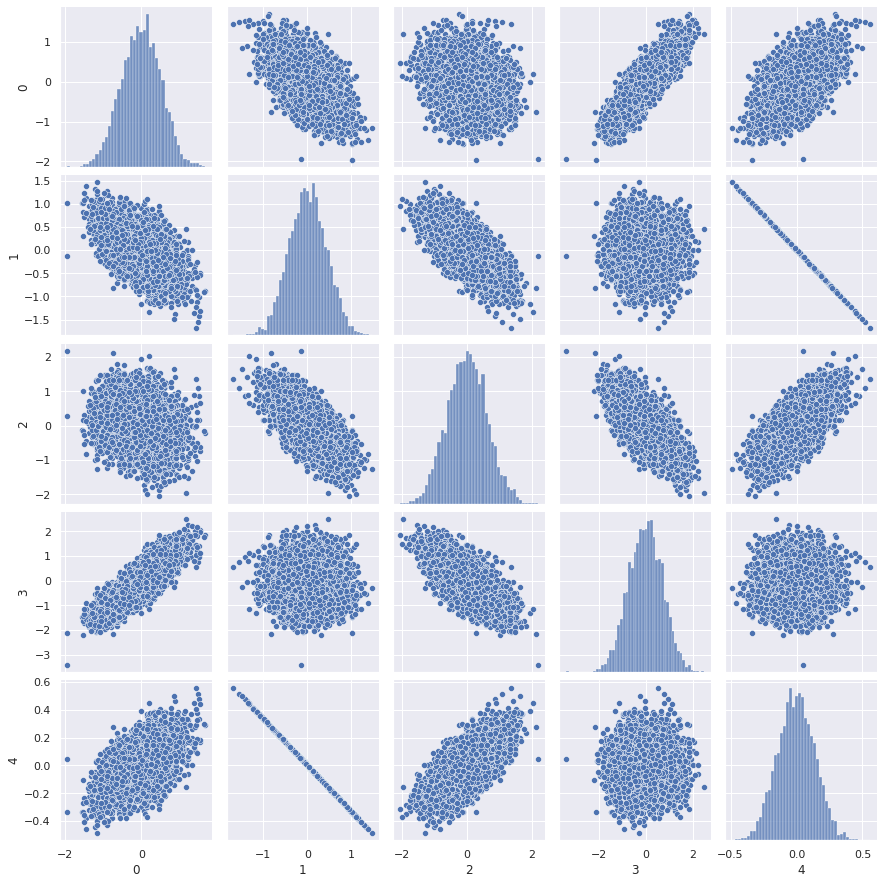

In [8]:
sns.pairplot(X)

In [9]:
pd.DataFrame(X).corr()

,0,1,2,3,4
0,1.000000,-0.551166,-0.206816,0.835301,0.551166
1,-0.551166,1.000000,-0.702366,-0.001645,-1.000000
2,-0.206816,-0.702366,1.000000,-0.710660,0.702366
3,0.835301,-0.001645,-0.710660,1.000000,0.001645
4,0.551166,-1.000000,0.702366,0.001645,1.000000


In [10]:
np.linalg.matrix_rank(pd.DataFrame(X).corr())

3

In [11]:
# Get Z-scores for X
X=(X-X.mean())/np.sqrt(X.var())

# Get eigenvalues for correlation matrix of X
pcs_vars, pcs = np.linalg.eigh(
    a=pd.DataFrame(X).corr()
)

# Transform eigenvectors from cols to rows
pcs = pcs.T

# Sort eigenvectors by eigenvalue size (desc)
pcs_vars, pcs = zip(
    *sorted(
        zip(pcs_vars, pcs),
        reverse=True
    )
)
pcs = np.array(pcs)

In [12]:
print('-'*100)
print('PCS VARIANCES (EIGENVALUES):\n{}'.format(
        pcs_vars
    )
)
print('-'*100)

----------------------------------------------------------------------------------------------------
PCS VARIANCES (EIGENVALUES):
(2.7995782726516554, 2.2004217273483446, 7.400551928450988e-16, 8.779179299407224e-17, -1.0776471663799816e-15)
----------------------------------------------------------------------------------------------------


In [13]:
print('-'*100)
print('CUMULATIVE VARIANCE EXPLAINED:\n{}'.format(
        np.cumsum(pcs_vars)/np.sum(pcs_vars)
    )
)
print('-'*100)

----------------------------------------------------------------------------------------------------
CUMULATIVE VARIANCE EXPLAINED:
[0.55991565 1.         1.         1.         1.        ]
----------------------------------------------------------------------------------------------------


In [14]:
print('-'*100)
print('PRINCIPAL COMPONENTS:\n{}'.format(pcs))
print('-'*100)

----------------------------------------------------------------------------------------------------
PRINCIPAL COMPONENTS:
[[ 0.29668569 -0.59642424  0.44624374 -0.0374216   0.59642424]
 [-0.5852078   0.0433169   0.4484445  -0.67281249 -0.0433169 ]
 [ 0.2384681   0.80100852  0.28560916  0.00432456  0.46896377]
 [ 0.06239282  0.02449505  0.71945857  0.46006266 -0.51597369]
 [ 0.7132668   0.01367879  0.02389199 -0.57814066 -0.39527953]]
----------------------------------------------------------------------------------------------------


In [15]:
# First PC
PC_NUMBER=1
pd.DataFrame(
    index=[0],
    data = dict(zip(X.corr().columns,pcs[PC_NUMBER-1]))
)

,0,1,2,3,4
0,0.296686,-0.596424,0.446244,-0.037422,0.596424


In [16]:
# Second PC
PC_NUMBER=2
pd.DataFrame(
    index=[0],
    data = dict(zip(X.corr().columns,pcs[PC_NUMBER-1]))
)

,0,1,2,3,4
0,-0.585208,0.043317,0.448445,-0.672812,-0.043317


In [17]:
# PROJECTION OF X ONTO PC BASIS
X_pc = np.matmul(X, pcs.T)
X_pc

,0,1,2,3,4
0,-1.649547,0.270671,3.177522e-16,-1.354328e-15,2.327080e-16
1,-0.822756,-1.283192,3.379633e-16,-1.482201e-16,4.634956e-16
2,1.032831,0.822927,-2.829957e-16,5.848374e-16,-4.930317e-16
3,-0.392194,-1.580840,2.709754e-16,4.410504e-16,5.115810e-16
4,-0.133192,0.459577,-3.127806e-17,-2.681718e-16,-1.516475e-16
...,...,...,...,...,...
4995,0.765973,1.894479,-3.409425e-16,-4.325488e-17,-8.244452e-16
4996,-1.796679,2.040914,1.545663e-16,-2.119449e-15,-9.350459e-17
4997,-0.129732,0.245580,-2.233911e-18,-1.862494e-16,-9.565480e-17
4998,-3.096747,1.936985,4.652418e-16,-3.051930e-15,-2.054165e-16


In [18]:
# TRANSPOSE OF IC MATRIX
I_T = I.T
print('-'*100)
print('IC MATRIX TRANSPOSED')
print('Shape: {}\nMatrix:\n{}'.format(
        I_T.shape,
        I_T
    )
)
print('-'*100)

----------------------------------------------------------------------------------------------------
IC MATRIX TRANSPOSED
Shape: (5000, 2)
Matrix:
[[-0.8044583   0.60796251]
 [ 0.32093155  0.93846369]
 [-0.02548288 -0.8482785 ]
 ...
 [-0.18954244 -0.06434491]
 [-2.23334735  0.50570314]
 [-0.31624526 -1.63094421]]
----------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Second IC vs Second PC')

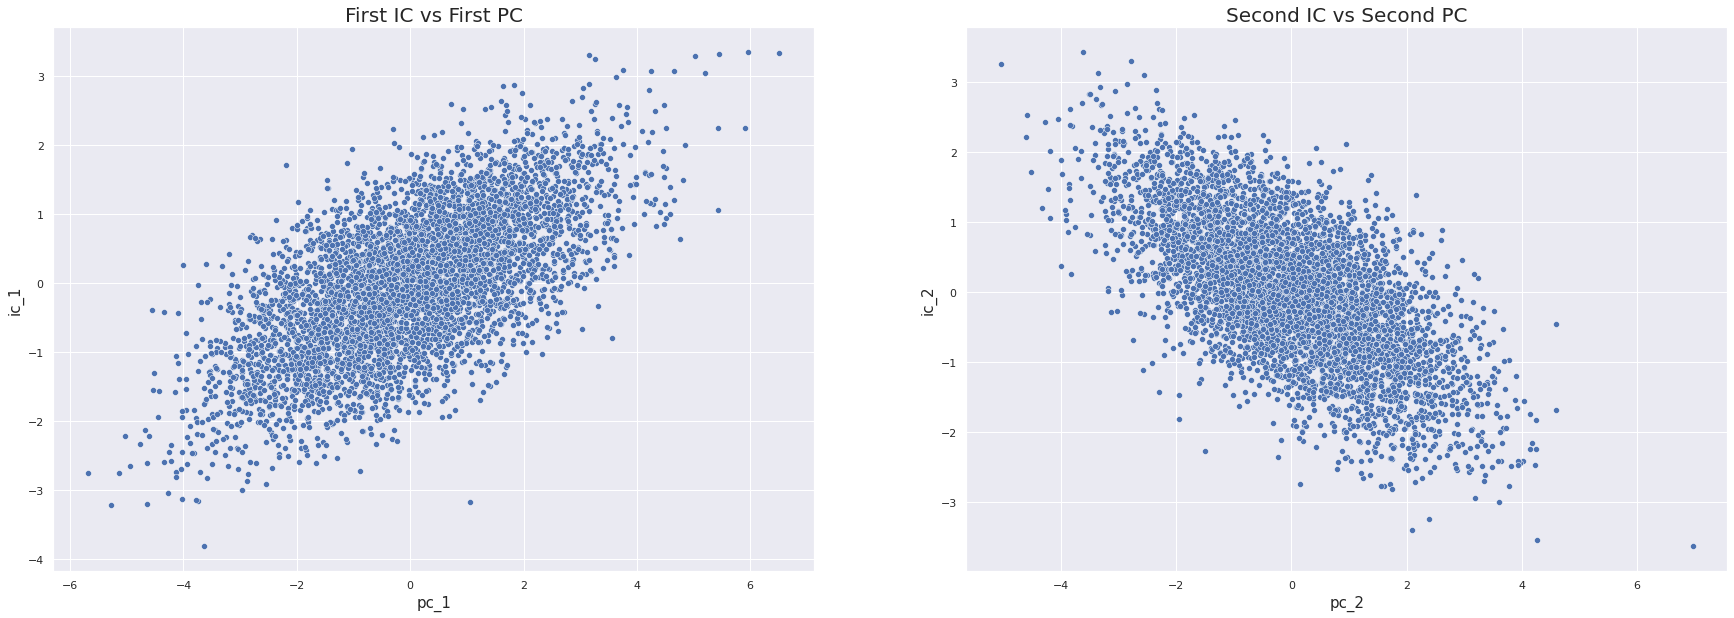

In [19]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(30,10)
)

# Ax1: first IC
sns.scatterplot(
    x=X_pc[0],
    y=I_T[:,0],
    ax=ax1
)
ax1.set_xlabel('pc_1', fontsize=15)
ax1.set_ylabel('ic_1', fontsize=15)
ax1.set_title('First IC vs First PC', fontsize=20)

# Ax2: second IC
sns.scatterplot(
    x=X_pc[1],
    y=I_T[:,1],
    ax=ax2
)
ax2.set_xlabel('pc_2', fontsize=15)
ax2.set_ylabel('ic_2', fontsize=15)
ax2.set_title('Second IC vs Second PC', fontsize=20)